<a href="https://colab.research.google.com/github/ThierryYeffou/Angular-Mini-Projet-Router/blob/master/Projet_data_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#importer les packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Collecter la liste de fichiers (datasets)
path = '/content/Projet'
all_files = [file for file in os.listdir(path)]
#Affichons le contenu de notre list de fichiers
for file in all_files:
    print(file)

Sales_October_2019.csv
Sales_July_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_September_2019.csv
Sales_March_2019.csv
Sales_June_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_January_2019.csv
Sales_November_2019.csv


In [19]:
#Creons une base de données pour regrouper les fichiers
all_data = pd.DataFrame()
path = '/content/Projet'
for file in all_files:
    #lecture du fichier courant
    current_file = pd.read_csv(path+'/'+file)
    #ajout/concatenation de la base avec le fichier courant
    all_data = pd.concat([all_data,current_file])

In [21]:
#Creons un fichier csv contenant toutes nos données :
all_data.to_csv(path+'/all_data.csv', index=False)


In [22]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [23]:
all_data.shape

(186850, 6)

In [24]:
#Nombre de ligne vide
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [25]:
#Suppression des valeurs manquantes
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


## **Trouvons le mois ayant réalisé le meilleur chiffre d'affaire**


In [27]:
#function qui extrait et retourne le mois sur le format date
def month(format_date):
    return format_date.split('/')[0]
month("04/19/19 08:46")

'04'

In [28]:
#Stocquons dans une colonne de la base de donnée le mois extrait :
all_data["Month"]=all_data["Order Date"].apply(month)
all_data.head()

<ipython-input-28-c1443b8f9f44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"]=all_data["Order Date"].apply(month)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


In [29]:
#Convertissons les mois en int pour faire nos opérations :
all_data["Month"].unique()

array(['10', 'Order Date', '11', '07', '08', '09', '05', '06', '03', '04',
       '02', '12', '01'], dtype=object)

In [30]:
all_data=all_data[all_data["Month"]!="Order Date"]
all_data["Month"].unique()

array(['10', '11', '07', '08', '09', '05', '06', '03', '04', '02', '12',
       '01'], dtype=object)

In [31]:
#Convertissons les mois en int pour faire nos opérations :
all_data["Month"]=all_data["Month"].astype(int)
all_data["Month"].unique()

array([10, 11,  7,  8,  9,  5,  6,  3,  4,  2, 12,  1])

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


In [33]:
#Convertissons les quantité et prix respectivement en int et float pour faire nos opérations :
all_data["Price Each"]=all_data["Price Each"].astype(float)
all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype(int)
all_data.dtypes
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10
...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",11
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",11
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",11
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",11


In [34]:
#Calculons le prix total de chaque commande et insérons le dans le tableau
all_data["Sales"]= all_data["Price Each"]*all_data["Quantity Ordered"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


In [35]:
#Déterminons au regard de nos données le mois ayant le plus grand chiffre d'affaire :
all_data.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

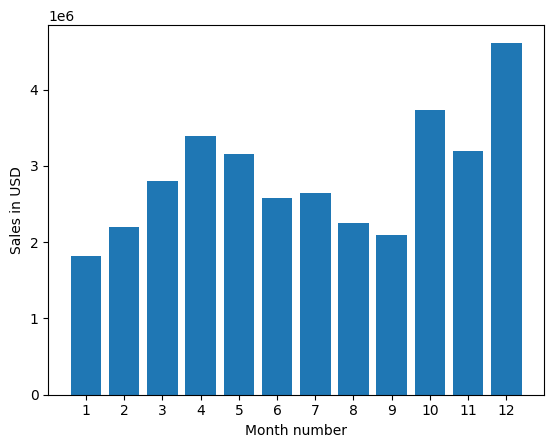

In [36]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

# **On peut deduire que les commandes sont abondantes sur le mois de decembre dû aux fêtes**

# **Ville ayant le plus grand nombre de commande**

In [39]:
def city(adress):
    return adress.split(',')[1]

 #simulation de la function
city("609 Cherry St, Dallas, TX 75001")

' Dallas'

In [40]:
all_data['city'] = all_data['Purchase Address'].apply(city)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",11,5.98,Los Angeles
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",11,11.95,Austin
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",11,14.95,Boston
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",11,2.99,Boston


In [43]:
#La ville ayant le plus de vente :
all_data.groupby("city")["city"].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

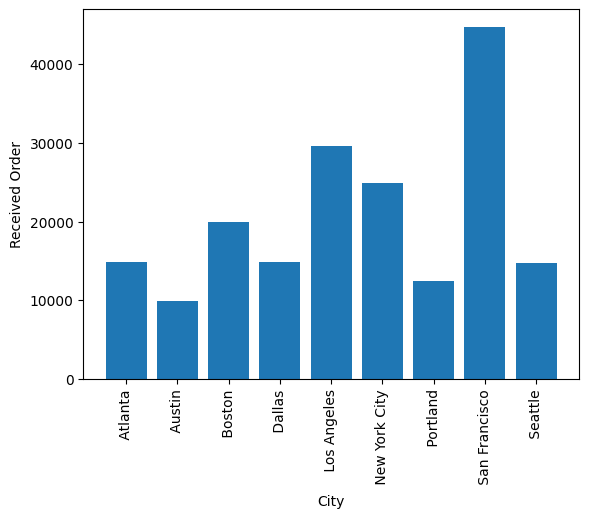

In [52]:
plt.bar(all_data.groupby('city')['city'].count().index, all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Received Order')
plt.xlabel('City')
plt.show()